In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


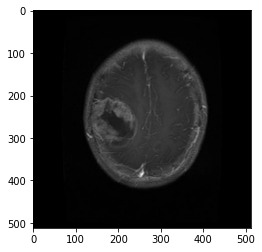

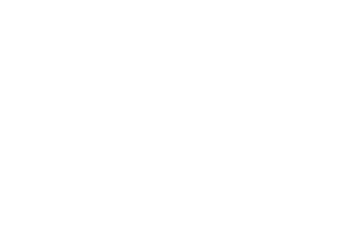

In [2]:
#Reading the training images from the path and labelling them into the given categories
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

DATADIR = r"/content/drive/MyDrive/MIT Capstone Project Group 2/Dataset/Training"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        plt.axis("off")
        break
    break
    break

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Reshaping all the images to 224X224
IMG_SIZE = 224
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array,cmap = "gray")
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

In [5]:
#Storing all the training images
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) 
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [6]:
X_train = []
y_train = []
for features_train,label_train in training_data:
    X_train.append(features_train)
    y_train.append(label_train)
X_train = np.array(X_train).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_train.shape)
X_train = X_train/255.0  
X_train = X_train.reshape(-1,224,224,1)


(2881, 224, 224)


Load the test images in the same way

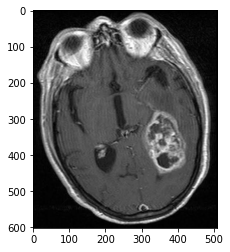

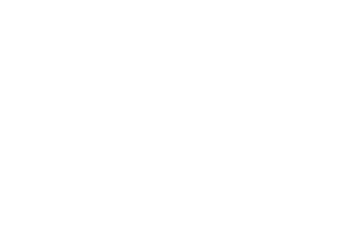

In [7]:
DATADIR = r"/content/drive/MyDrive/MIT Capstone Project Group 2/Dataset/Testing"
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array1 = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array1)
        plt.show()
        plt.axis("off")
        break
    break

In [8]:
#Reshaping all the images to 224X224
IMG_SIZE = 224
new_array1 = cv2.resize(img_array1,(IMG_SIZE,IMG_SIZE))    
plt.imshow(new_array1,cmap = "gray")
plt.axis("off")

(-0.5, 223.5, 223.5, -0.5)

In [9]:
#Storing all the testing images
test_data = []
CATEGORIES = ["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
def create_test_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array1 = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array1,(IMG_SIZE,IMG_SIZE)) 
                test_data.append([new_array,class_num])
            except Exception as e:
                pass
create_test_data()

In [10]:

X_test = []
y_test = []
for features_test,label_test in test_data:
    X_test.append(features_test)
    y_test.append(label_test)
X_test = np.array(X_test).reshape(-1,IMG_SIZE,IMG_SIZE)
print(X_test.shape)
X_test = X_test/255.0  
X_test = X_test.reshape(-1,224,224,1)



(402, 224, 224)


In [11]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [12]:
## Importing the required libraries
import numpy as np
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from tensorflow.keras.utils import to_categorical as ms 

# fix random seed for reproducibility
seed = 7

np.random.seed(seed)

In [13]:

from keras.datasets import cifar10

y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [14]:

from tensorflow.keras import losses
from tensorflow.keras import optimizers

import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler


basemodel = keras.applications.EfficientNetB2( 
    weights="imagenet",
    input_tensor=keras.Input(shape=(224, 224, 3)),
    include_top=False
)

31793152/31790344 [==============================] - 0s 0us/step


In [15]:
basemodel.summary()

Model: "efficientnetb2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [16]:
# Freeze the basemodel weights , so these weights won't change during training
basemodel.trainable = False

In [17]:
from tensorflow import image,convert_to_tensor
x_train_=image.grayscale_to_rgb(
    convert_to_tensor(X_train)
)
x_test_=image.grayscale_to_rgb(
    convert_to_tensor(X_test)
)

In [18]:
# Add classification head to the model

headmodel = basemodel.output
headmodel = GlobalAveragePooling2D(name = 'global_average_pool')(headmodel)
headmodel = Flatten(name= 'flatten')(headmodel)
headmodel = Dense(224, activation = "relu", name = 'dense_1')(headmodel)
headmodel = Dropout(0.3)(headmodel)
headmodel = Dense(128, activation = "relu", name = 'dense_2')(headmodel)
headmodel = Dropout(0.2)(headmodel)
headmodel = Dense(4, activation = 'softmax', name = 'dense_3')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [19]:
# compile the model
model.compile(loss = 'categorical_crossentropy', optimizer= SGD(lr=.01, momentum=.9) , metrics= ["accuracy"])

In [20]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)


      
X_train= np.array(X_train)   
X_test= np.array(X_test)   
y_train= np.array(y_train)
y_test = np.array(y_test)


history = model.fit(x_train_,y_train_encoded, epochs = 5, validation_data=(x_test_,y_test_encoded))

Epoch 1/5
91/91 [==============================] - 26s 139ms/step - loss: 1.3684 - accuracy: 0.2876 - val_loss: 1.4320 - val_accuracy: 0.2861
Epoch 2/5
91/91 [==============================] - 10s 107ms/step - loss: 1.3527 - accuracy: 0.3004 - val_loss: 1.4384 - val_accuracy: 0.2861
Epoch 3/5
91/91 [==============================] - 10s 108ms/step - loss: 1.3562 - accuracy: 0.2767 - val_loss: 1.4544 - val_accuracy: 0.2488
Epoch 4/5
91/91 [==============================] - 10s 108ms/step - loss: 1.3576 - accuracy: 0.2756 - val_loss: 1.4757 - val_accuracy: 0.2861
Epoch 5/5
91/91 [==============================] - 10s 108ms/step - loss: 1.3629 - accuracy: 0.2705 - val_loss: 1.4453 - val_accuracy: 0.1841


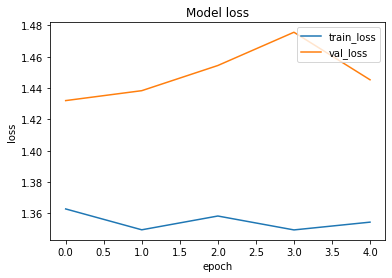

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

In [22]:
# predict on the test dataset        
# Your code here
y_pred_test = model.predict(x_test_)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred_test_classes)

0.18407960199004975

In [24]:
plt.figure(figsize=(16, 8))    #code down from here is not complete 
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(4), y_pred_test_classes, rotation=0)
plt.yticks(np.arange(4), y_pred_test_classes)
plt.colorbar()
plt.show()

In [25]:
# unfreeze the weights in the base model, now these weights will be changed during training
basemodel.trainable = True

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
______________________________________________________________________________________________

In [27]:
# fine tune the model with very low learning rate
model.compile(loss = 'categorical_crossentropy', optimizer= SGD(lr=0.0001, momentum=.9) , metrics= ["accuracy"])
history = model.fit(x_train_,y_train_encoded,  epochs = 10, validation_data= (x_test_,y_test_encoded))

Epoch 1/10
91/91 [==============================] - 54s 479ms/step - loss: 1.3748 - accuracy: 0.3037 - val_loss: 1.4898 - val_accuracy: 0.2488
Epoch 2/10
91/91 [==============================] - 43s 471ms/step - loss: 1.3343 - accuracy: 0.3297 - val_loss: 1.5016 - val_accuracy: 0.2488
Epoch 3/10
91/91 [==============================] - 43s 474ms/step - loss: 1.3156 - accuracy: 0.3623 - val_loss: 1.4690 - val_accuracy: 0.1940
Epoch 4/10
91/91 [==============================] - 43s 473ms/step - loss: 1.2744 - accuracy: 0.4085 - val_loss: 1.4541 - val_accuracy: 0.2388
Epoch 5/10
91/91 [==============================] - 43s 471ms/step - loss: 1.2469 - accuracy: 0.4439 - val_loss: 1.4453 - val_accuracy: 0.2388
Epoch 6/10
91/91 [==============================] - 43s 475ms/step - loss: 1.2163 - accuracy: 0.4917 - val_loss: 1.4321 - val_accuracy: 0.2562
Epoch 7/10
91/91 [==============================] - 43s 473ms/step - loss: 1.1778 - accuracy: 0.5231 - val_loss: 1.4489 - val_accuracy: 0.2861

In [28]:
# predict on the test dataset        
# Your code here
y_pred_test = model.predict(x_test_)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred_test_classes)

0.26616915422885573

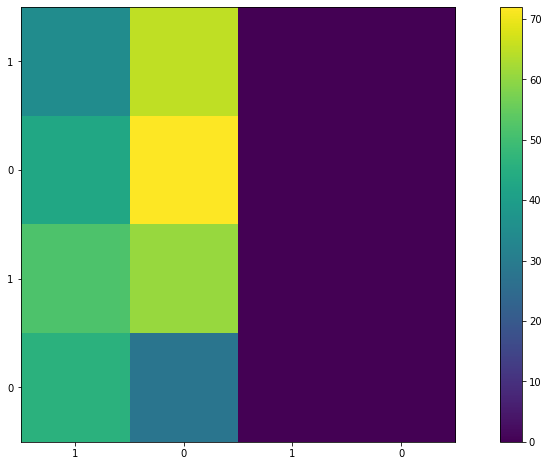

In [30]:
plt.figure(figsize=(16, 8))    #code down from here is not complete 
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(4), y_pred_test_classes, rotation=0)
plt.yticks(np.arange(4), y_pred_test_classes)
plt.colorbar()
plt.show()